In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns

In [2]:
import pandas as pd

In [5]:
df_TOCC = pd.read_csv('../../../datasets/TypeOfContractChannel.csv')
df_TOCC[:2]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0


#### 다변수

#### X(설명변수) / Y(목표변수) : 범주형 / 연속형 

In [6]:
df_TOCC.columns

Index(['id', 'type_of_contract', 'type_of_contract2', 'channel', 'datetime',
       'Term', 'payment_type', 'product', 'amount', 'state', 'overdue_count',
       'overdue', 'credit rating', 'bank', 'cancellation', 'age', 'Mileage'],
      dtype='object')

In [11]:
df_TOCC['amount'].describe()
## AMOUNT는 목표변수. 연속형. 

count     51304.000000
mean      93994.980021
std       15305.147334
min       54603.000000
25%       81900.000000
50%       96900.000000
75%       98400.000000
max      215700.000000
Name: amount, dtype: float64

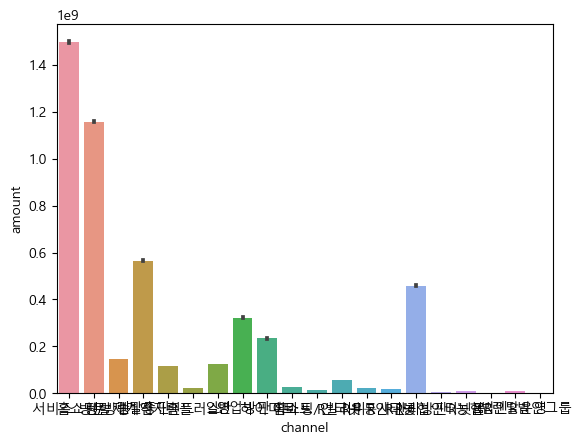

In [24]:
# sns.barplot(data=df_TOCC, x='channel', y='amount')
#기본평균 (채널별 평균) 
sns.barplot(data=df_TOCC, x='channel', y='amount', estimator=sum)
#기본총합 / np.sum과 비슷 
plt.show()
#유의범위 거의 사용안함 

In [30]:
#요약 툴 - 데이터의 특정 부분 요약 - group by - 어떤값을 기준으로 - 디폴트는 평균이 나와 - 집합함수인 aggfunc 
df_TOCC_sum = pd.pivot_table(data=df_TOCC, index='channel', values='amount', aggfunc=sum)
# 데이터 추출 마지막 7개, index만, list 형식으로 
df_TOCC_bottom_list = df_TOCC_sum.sort_values(by='amount', ascending=False).iloc[-7:].index.to_list()
#이걸 시각화 


<Axes: xlabel='channel', ylabel='amount'>

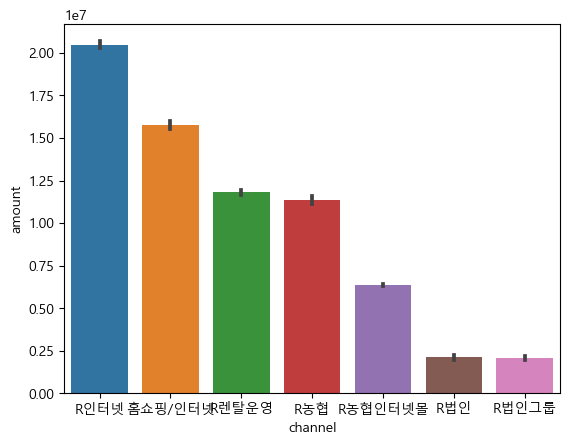

In [31]:
sns.barplot(data=df_TOCC, x='channel', y='amount', estimator=sum, order=df_TOCC_bottom_list) #하위 7개 순위 표현 

<Axes: xlabel='channel', ylabel='amount'>

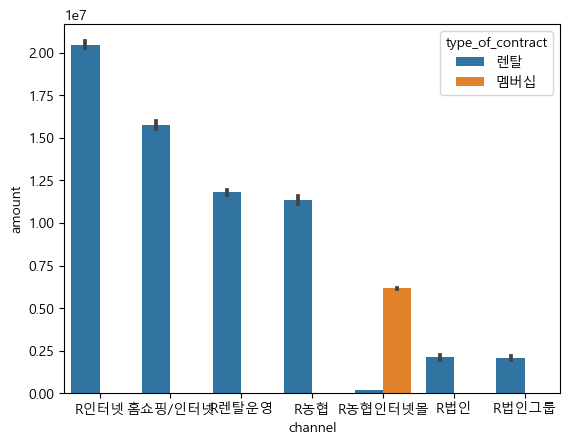

In [35]:
sns.barplot(data=df_TOCC, x='channel', y='amount', estimator=sum, order=df_TOCC_bottom_list, hue='type_of_contract')
# 계약 종류 포함/ amount가 맴버쉽, 렌탈 중 어떻게 이루어져있는지 